# PyTorch - Model Building Blocks

This notebook covers the building blocks required to build a model.

Models are defined using the nn.Module class. This class provides all the necessary structure to build Neural Networks. To create your model, you inherit from the nn.Module class, overloading the required methods. 

These are two key functions that you need to define:
- `__init__` Method: Class constructor where we define the layers.
- `forward` Method: Define how the layers are connected to each other. This is done by establishing how a forward pass would work, from the input data to the predicted output.

# 0. Imports, Constants and Support Functions

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
CONFIG = {"seed": 14}

# 1. Generate a Toy Dataset

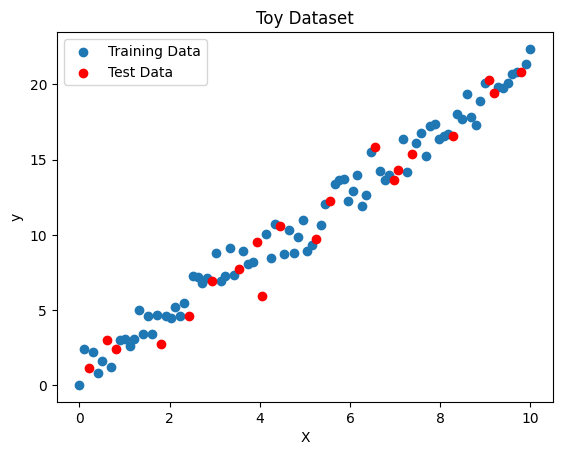

In [3]:
# Generate a simple regression model with noise
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + torch.randn(X.size())

# Split between Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=CONFIG["seed"]
)

# Plot training and test dataset
plt.scatter(x=X_train, y=y_train, label="Training Data")
plt.scatter(x=X_test, y=y_test, label="Test Data", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Toy Dataset")
plt.legend()

# 2. Generate your model

This is how you define a really simple model and use it untrained.

In [4]:
class LRModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        # Start base class
        super(LRModel, self).__init__()

        # Define linear regression
        self.linear = nn.Linear(in_features=input_dim, out_features=output_dim)

    def forward(self, x):
        return self.linear(x)

In [5]:
# Define parameters
input_dim = 1
output_dim = 1

# Instantiate class
lr_model = LRModel(input_dim=input_dim, output_dim=output_dim)

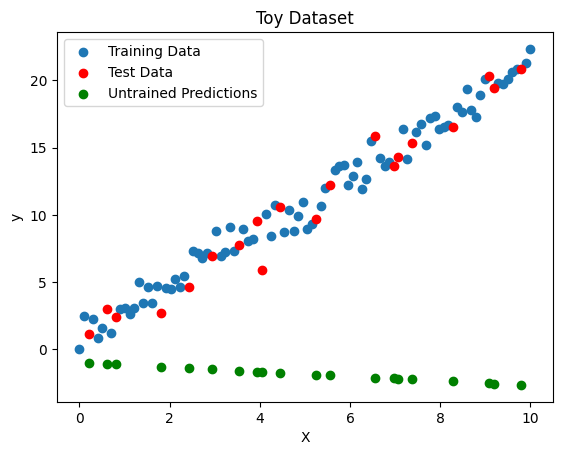

In [6]:
# Predict without training
with torch.no_grad():
    y_untrained = lr_model(X_test)

# Plot training and test dataset
plt.scatter(x=X_train, y=y_train, label="Training Data")
plt.scatter(x=X_test, y=y_test, label="Test Data", color="red")
plt.scatter(x=X_test, y=y_untrained, label="Untrained Predictions", color="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Toy Dataset")
plt.legend()

# 3. Training your model

The previous performance is pretty abysmal, so we would like to fit our model to the training data. 

To do this, we need to define:
- Loss function: The function to optimize, telling the model "how wrong it is". 
    - In this case, we will use Mean Square Error (MSE), as we are facing a Regression task. 
    - Binary Classification: Use BCEWithLogitsLoss or BCELoss.
    - Multi-Class Classification: Use CrossEntropyLoss or NLLLoss.
    - Multi-Label Classification (where an input can belong to multiple classes): Use BCELoss or BCEWithLogitsLoss but ensure the output layer handles multi-label scenarios (e.g., multiple Sigmoids instead of a Softmax).
- Optimizer: Algorithms that will tune the network parameters to minimize the loss function. Common optimizers are Stochastic Gradient Descent (SGD) or Adam.
- Epochs: Number of times our dataset is used to train the data.

The training loop is the process of repeatedly passing the training data through the model to update the model parameters. The usual steps of this training loop are the following:
- **Forward Pass**: Compute output by passing an input sample through the defined network. 
- **Calculate Loss**: Compare label with predicted output and calculate loss.
- **Backward Pass**: Backpropagate the loss calculating the gradients.
- **Update Parameters**: Adjust the model parameters using the optimizer.